<a href="https://colab.research.google.com/github/weedge/doraemon-nb/blob/main/achatbot_deepseek_janus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# install

In [ ]:
!cd /content && rm -rf achatbot && git clone --recursive https://github.com/ai-bot-pro/achatbot.git

In [100]:
%cd /content/achatbot

/content/achatbot


In [ ]:
!bash scripts/pypi_achatbot.sh dev


In [ ]:
!pip install -q "dist/achatbot-0.0.8.6-py3-none-any.whl[llm_transformers_manual_vision_img_janus]"

# download model


In [5]:
from google.colab import userdata
HF_TOKEN=userdata.get('HF_TOKEN')

In [ ]:
!huggingface-cli login --token $HF_TOKEN --add-to-git-credential

In [ ]:
!huggingface-cli download deepseek-ai/Janus-1.3B --quiet --local-dir /content/models/deepseek-ai/Janus-1.3B

In [ ]:
!huggingface-cli download stabilityai/sdxl-vae --quiet --local-dir /content/models/stabilityai/sdxl-vae

In [ ]:
!huggingface-cli download deepseek-ai/JanusFlow-1.3B --quiet --local-dir /content/models/deepseek-ai/JanusFlow-1.3B

In [77]:
!huggingface-cli download deepseek-ai/Janus-Pro-1B --quiet --local-dir /content/models/deepseek-ai/Janus-Pro-1B

/content/models/deepseek-ai/Janus-Pro-1B


In [79]:
!huggingface-cli download deepseek-ai/Janus-Pro-7B --quiet --local-dir /content/models/deepseek-ai/Janus-Pro-7B

/content/models/deepseek-ai/Janus-Pro-7B


# test

## VLM Multimodal Understanding


In [102]:
!LLM_DEVICE=cuda LLM_MODEL_NAME_OR_PATH=/content/models/deepseek-ai/Janus-Pro-1B \
    python -m unittest test.core.llm.test_transformers_v_janus.TestTransformersVJanus.test_chat_completion_prompts

Python version is above 3.10, patching the collections module.
2025-02-05 11:21:24.605220: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738754484.628247   65462 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738754484.635007   65462 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-05 11:21:25,788 - tensorflow - DEBUG - /usr/local/lib/python3.11/dist-packages/tensorflow/python/distribute/cluster_resolver/tpu/tpu_cluster_resolver.py:34 - <module> - Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.
2025-02-05 11:21:25,958 - h5py._conv - DEBUG - /usr/local/lib/python3.

VLM Multimodal Understanding
- 必须有图片作为上下文来进行交互
- 生成文本速度较快（因对应的图片而异）
- ToDo： 与VLM DeepSeek-VL2(MoE结构)进行对比

## Text-to-Image Generation image

In [91]:
!LLM_DEVICE=cuda LLM_MODEL_NAME_OR_PATH=/content/models/deepseek-ai/Janus-Pro-1B PARALLEL_SIZE=2 \
    python -m unittest test.core.llm.test_transformers_img_janus.TestTransformersImgJanus.test_gen_imgs

Python version is above 3.10, patching the collections module.
2025-02-05 10:56:31.986137: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738752992.007652   58670 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738752992.014103   58670 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-05 10:56:33,160 - tensorflow - DEBUG - /usr/local/lib/python3.11/dist-packages/tensorflow/python/distribute/cluster_resolver/tpu/tpu_cluster_resolver.py:34 - <module> - Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.
2025-02-05 10:56:33,326 - h5py._conv - DEBUG - /usr/local/lib/python3.

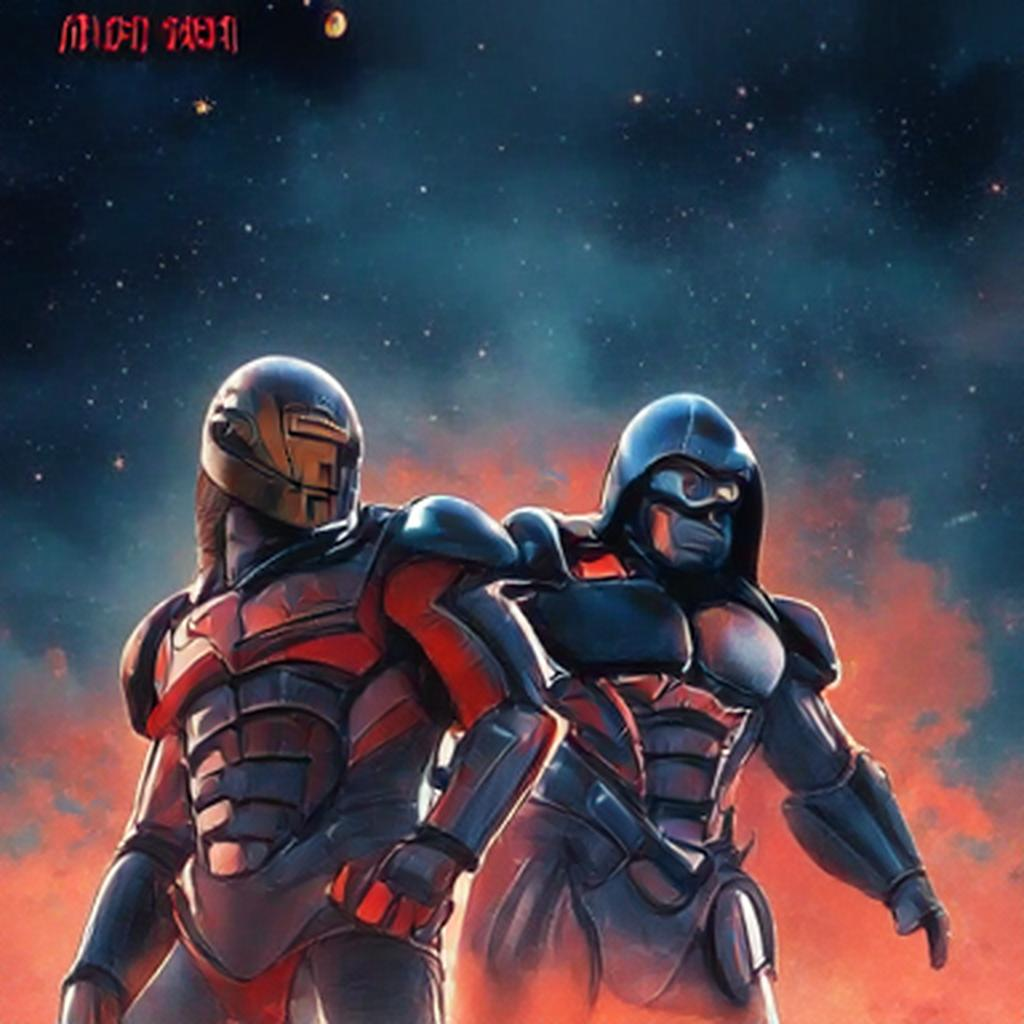

In [92]:
from IPython.display import Image
Image(filename='/content/achatbot/generated_samples/pro_img_0_0.jpg')

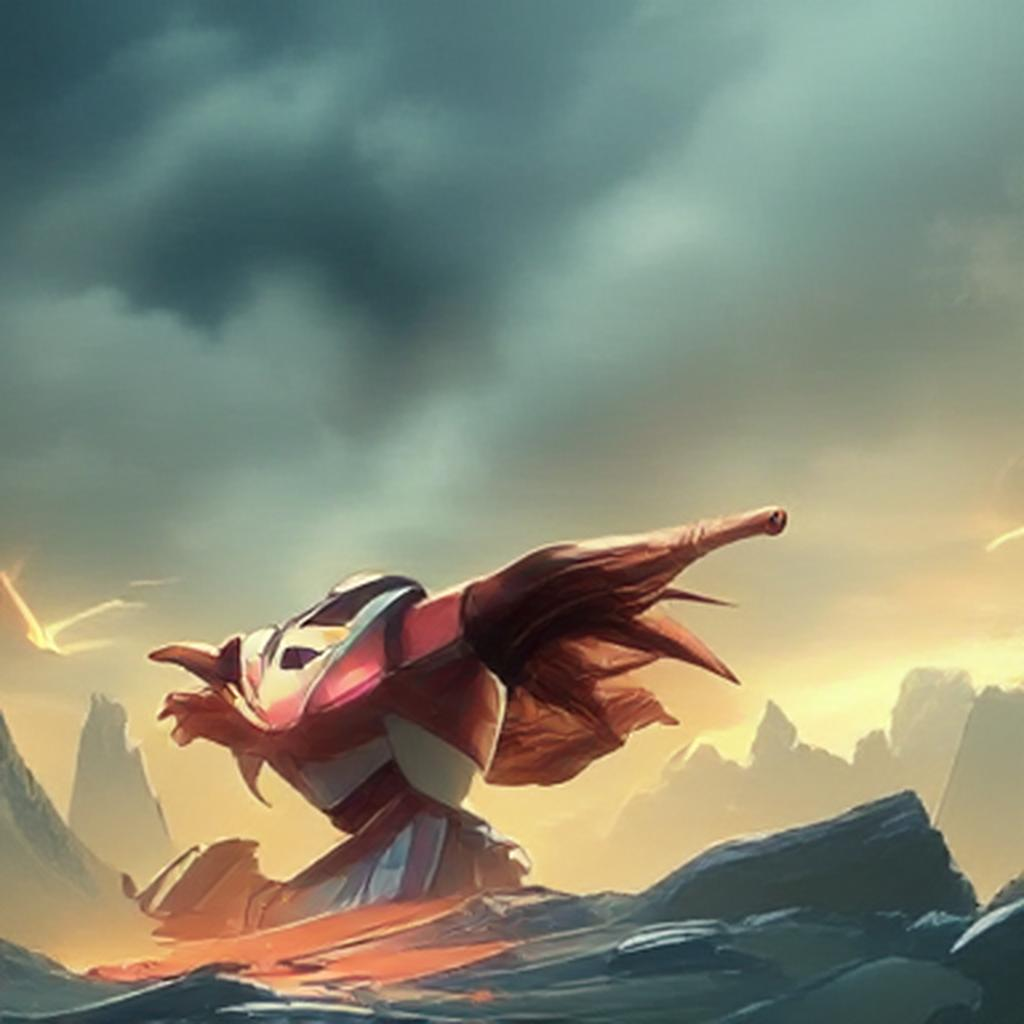

In [93]:
from IPython.display import Image
Image(filename='/content/achatbot/generated_samples/pro_img_0_1.jpg')

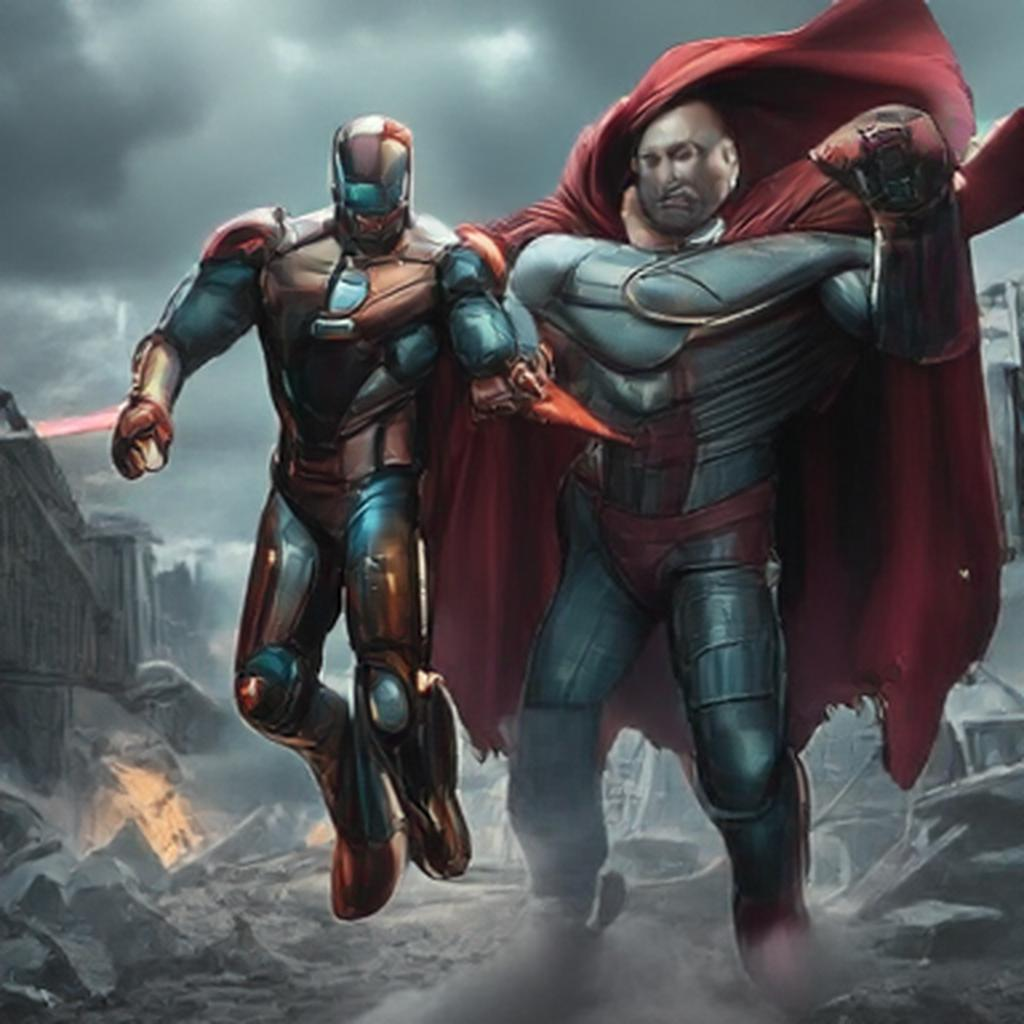

In [94]:
from IPython.display import Image
Image(filename='/content/achatbot/generated_samples/pro_img_1_0.jpg')

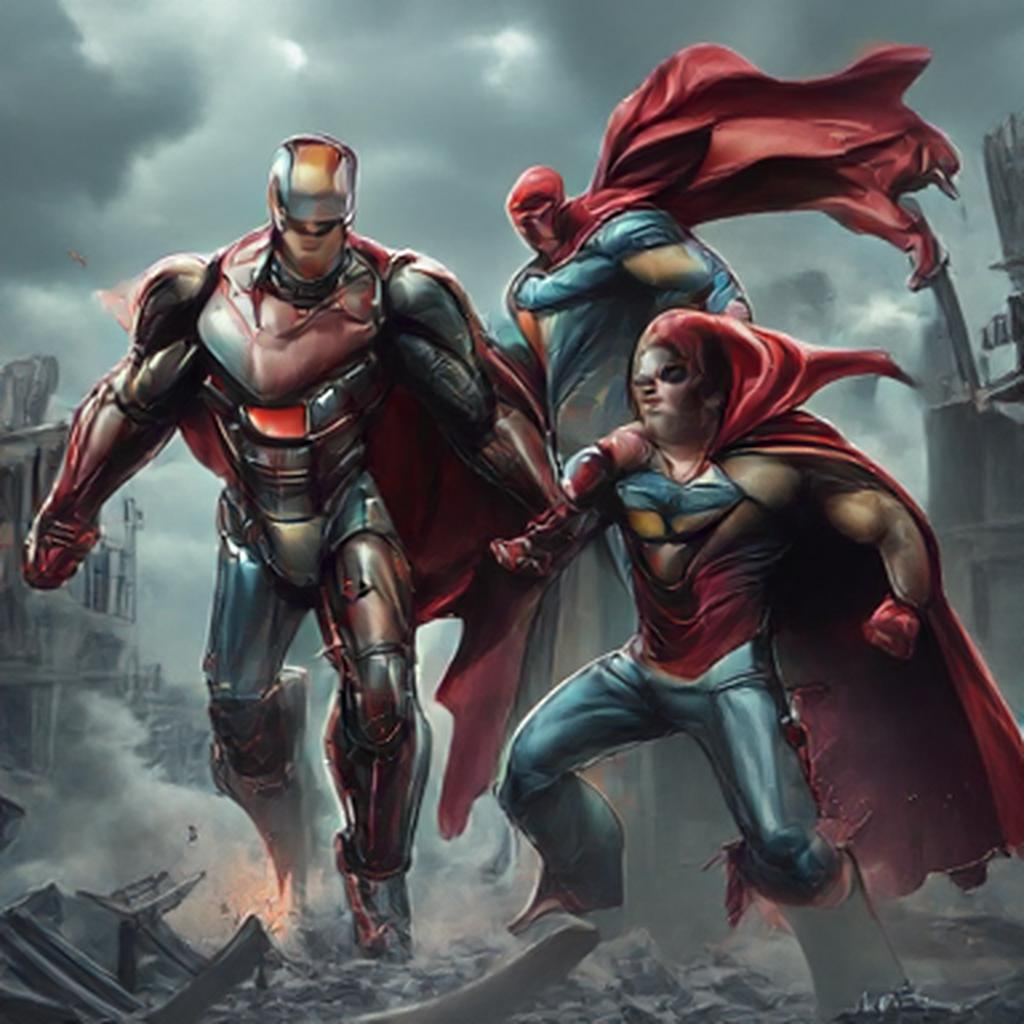

In [95]:
from IPython.display import Image
Image(filename='/content/achatbot/generated_samples/pro_img_1_1.jpg')

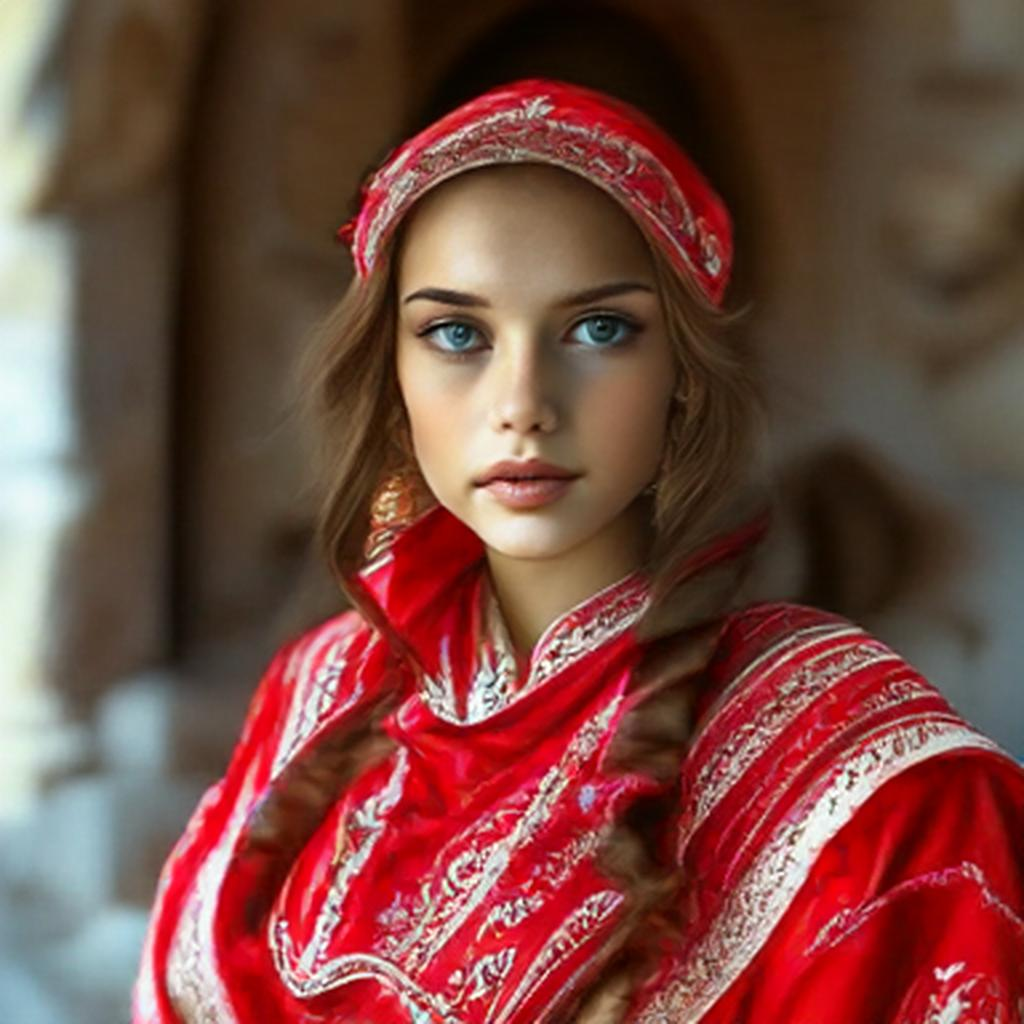

In [96]:
from IPython.display import Image
Image(filename='/content/achatbot/generated_samples/pro_img_2_0.jpg')

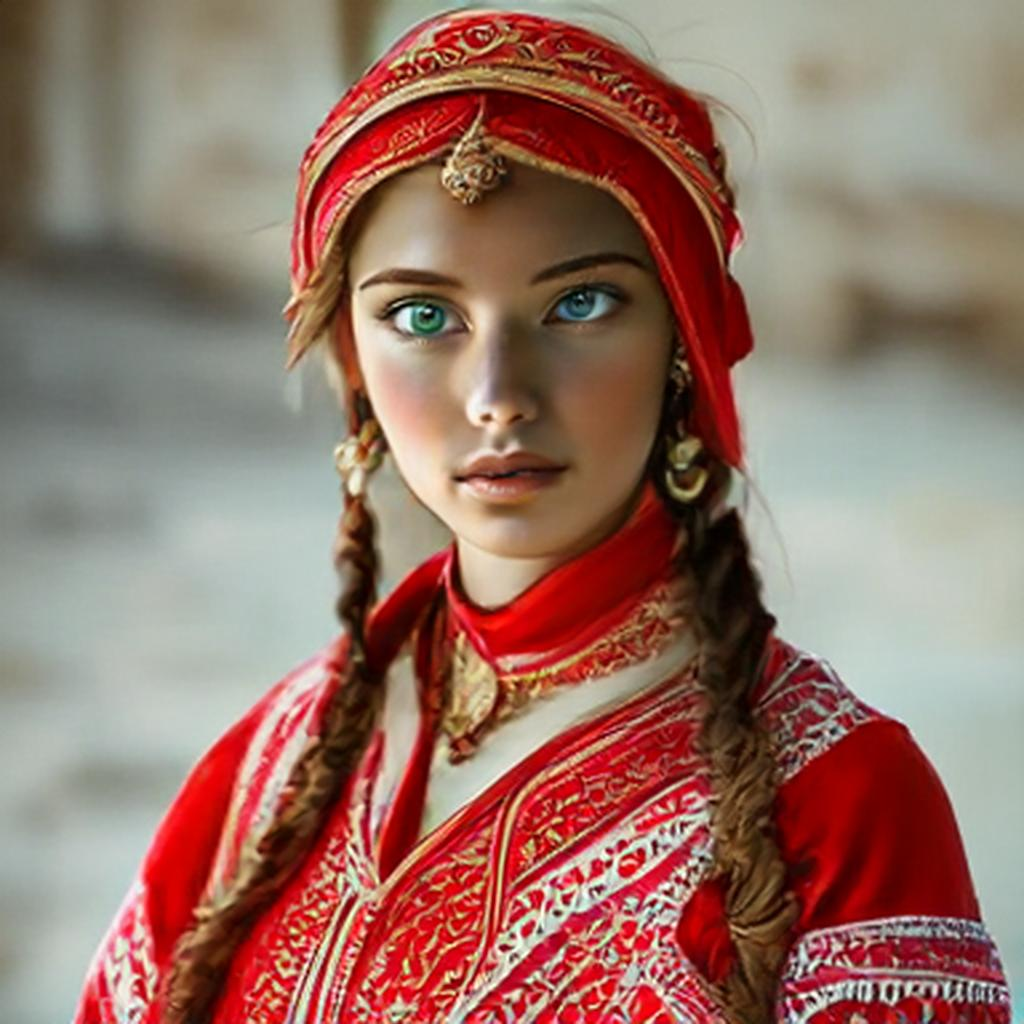

In [97]:
from IPython.display import Image
Image(filename='/content/achatbot/generated_samples/pro_img_2_1.jpg')

In [98]:
from PIL import Image
img = Image.open("/content/achatbot/generated_samples/pro_img_2_0.jpg")
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7DC015544F50>


janus-pro 文生图：
- 中文prompt支持不够友好，现在大部分文生图的prompt使用英文描述
- 适合人物头像描述场景
- 其他场景，比如卡通人物场景需要LoRA微调



# 总结
- 模型还有scaling的空间，如果支持的数据集多样，泛化能力更强
- 是否可以利用SOTA 模型(VLM， gen img(diffusion) 的合成数据来优化？